In [1]:
from classes.GeradorDeDisturbios import GeradorDeDisturbios
import matplotlib.pyplot as plt
import numpy as np

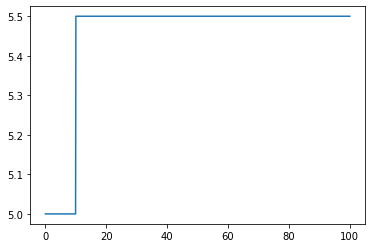

In [2]:
degrau = GeradorDeDisturbios().degrau(0.1,10)

dt = np.linspace(0, 100, 1000)
dist = [degrau.dist(i) for i in dt]
plt.plot(dt, dist)
plt.show()

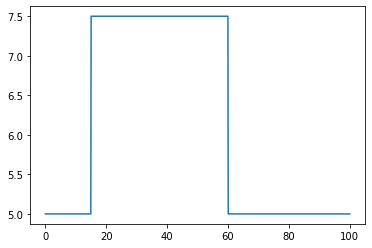

In [5]:
pulso = GeradorDeDisturbios().pulso(0.2,15,60)

dt = np.linspace(0, 100, 1000)
dist = [pulso.dist(i) for i in dt]
plt.plot(dt, dist)
plt.show()

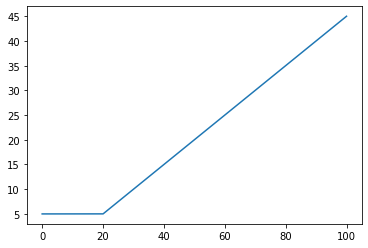

In [7]:
rampa = GeradorDeDisturbios().rampa(0.5,20)

dt = np.linspace(0, 100, 1000)
dist = [rampa.dist(i) for i in dt]
plt.plot(dt, dist)
plt.show()

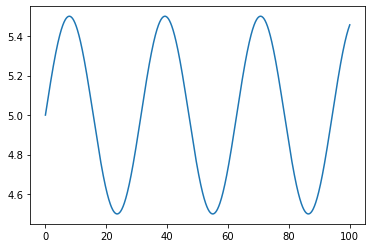

In [12]:
senoidal = GeradorDeDisturbios().senoidal(0.1,0.2)

dt = np.linspace(0, 100, 1000)
dist = [senoidal.dist(i) for i in dt]
plt.plot(dt, dist)
plt.show()

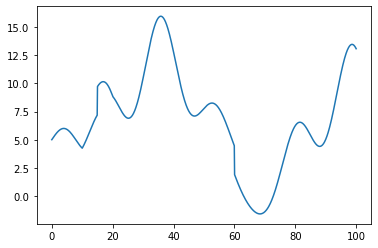

In [13]:
## Gerar sinal composto

senoidal1 = GeradorDeDisturbios().senoidal(0.5,0.3,10)
senoidal2 = GeradorDeDisturbios().senoidal(0.2,0.4,0)
senoidal3 = GeradorDeDisturbios().senoidal(1,0.1,20)

disturbios_a_somar = [senoidal1,senoidal2,senoidal3,pulso]

sinal_composto = GeradorDeDisturbios(5).sinal_composto(disturbios_a_somar)

dt = np.linspace(0, 100, 1000)
dist = [sinal_composto.dist(i) for i in dt]
plt.plot(dt, dist)
plt.show()

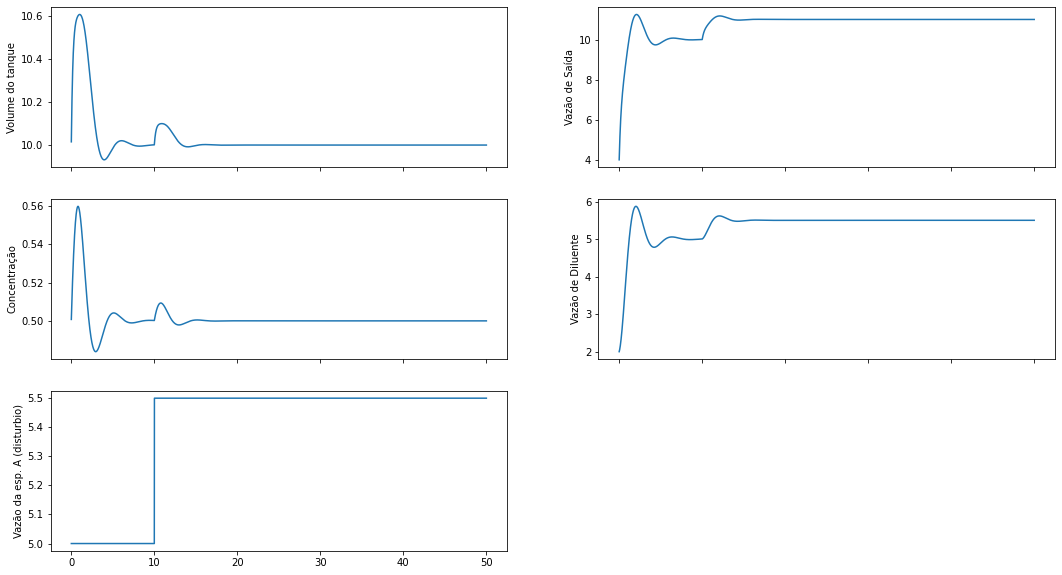

In [15]:
from classes.SistemaFisico import Misturador
from params import obter_parametros

sistema_fisico = Misturador().simular(degrau).plotar_graficos()

In [3]:
from classes.AnalisadorDeConstantes import AnalisadorDeConstantes
from classes.SistemaFisico import Misturador
from classes.GeradorDeDisturbios import GeradorDeDisturbios

sistema_fisico = Misturador()
degrau = GeradorDeDisturbios().degrau(0.1,15)
analisador = AnalisadorDeConstantes(sistema_fisico,Rmax=0.01,tsample_inicial=1e-5,disturbio=degrau)
analisador.otimizar_constantes().escrever_no_banco()

In [4]:
analisador.melhores_constantes

[-25.52533096429977,
 1.205056500066606,
 0.0020465540326064886,
 -26.18085404958959,
 0.5192377841011458,
 0.005097508709247158]

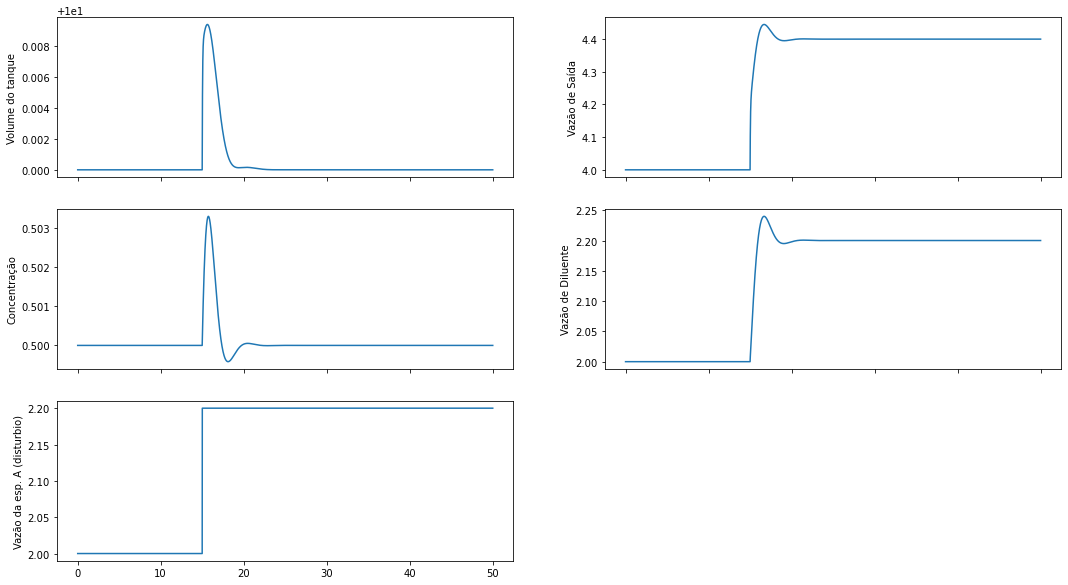

In [5]:
sistema_fisico.constantes_controlador = analisador.melhores_constantes
sistema_fisico.simular(degrau).plotar_graficos()

In [6]:
sistema_fisico.score()

0.0143797874762736

In [9]:
print(senoidal1.intensidade)
print(senoidal2.intensidade)
print(senoidal3.intensidade)

0.5
0.2
1


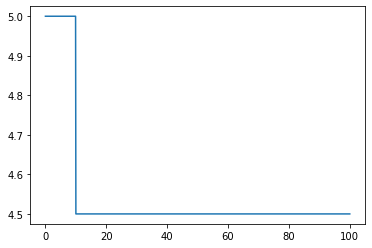

In [10]:
degrau = GeradorDeDisturbios().degrau(-0.1,10)

dt = np.linspace(0, 100, 1000)
dist = [degrau.dist(i) for i in dt]
plt.plot(dt, dist)
plt.show()

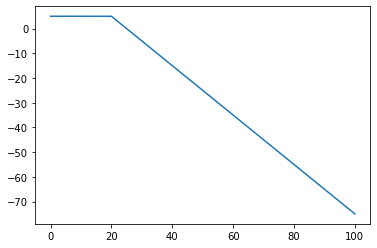

In [11]:
rampa = GeradorDeDisturbios().rampa(-1,20)

dt = np.linspace(0, 100, 1000)
dist = [rampa.dist(i) for i in dt]
plt.plot(dt, dist)
plt.show()

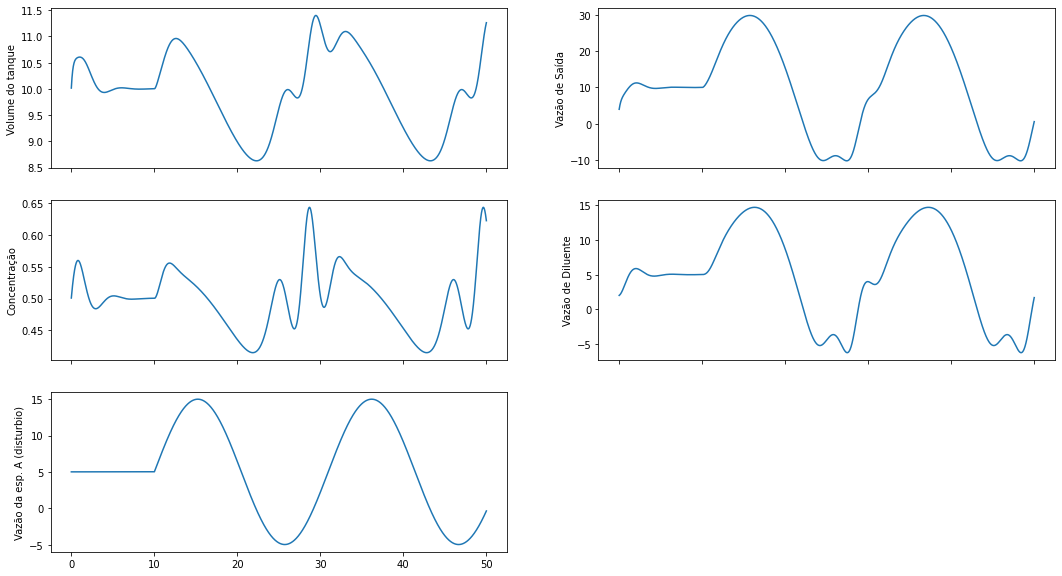

In [12]:
sistema_fisico = Misturador().simular(senoidal).plotar_graficos()

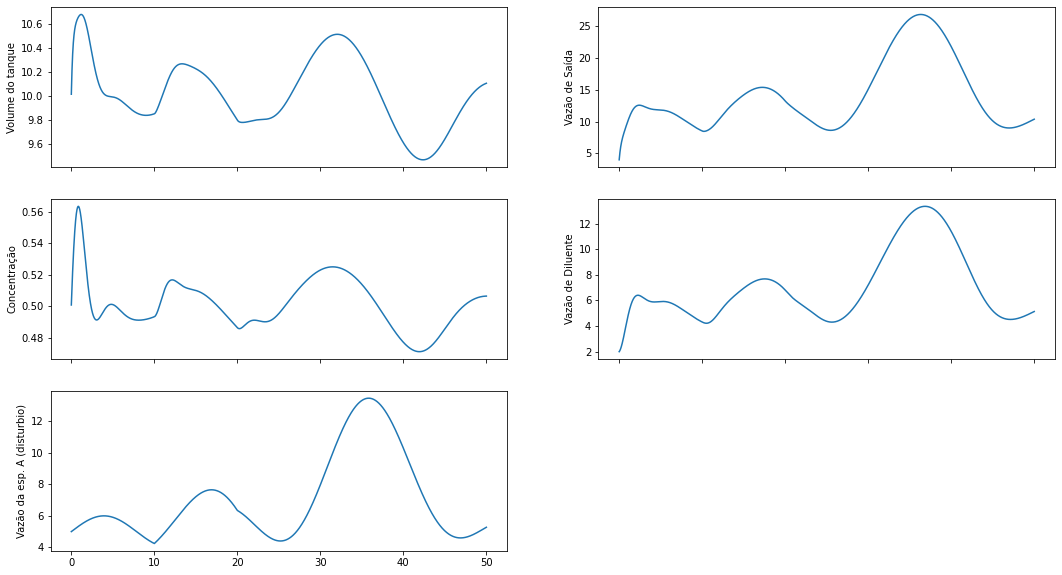

In [13]:
sistema_fisico = Misturador().simular(sinal_composto).plotar_graficos()